# イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [1]:
import numpy  as np
import os, sys
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline


## osを使用する場合

In [2]:
sys.path

['/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12',
 '/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python38.zip',
 '/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8',
 '/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/lib-dynload',
 '',
 '/Users/sasanoshouta/.local/lib/python3.8/site-packages',
 '/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/site-packages',
 '/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/site-packages/IPython/extensions',
 '/Users/sasanoshouta/.ipython']

In [3]:
path = '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/' 
flist = os.listdir(path)

In [4]:
!ls -a /Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/

.             cat.0.jpg     cat.3.jpg     dog.12496.jpg dog.12499.jpg
..            cat.1.jpg     cat.4.jpg     dog.12497.jpg
.DS_Store     cat.2.jpg     dog.12495.jpg dog.12498.jpg


In [5]:
flist

['cat.4.jpg',
 'cat.0.jpg',
 '.DS_Store',
 'cat.1.jpg',
 'cat.3.jpg',
 'cat.2.jpg',
 'dog.12497.jpg',
 'dog.12496.jpg',
 'dog.12495.jpg',
 'dog.12498.jpg',
 'dog.12499.jpg']

In [6]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''

flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat.4.jpg',
 'cat.0.jpg',
 'cat.1.jpg',
 'cat.3.jpg',
 'cat.2.jpg',
 'dog.12497.jpg',
 'dog.12496.jpg',
 'dog.12495.jpg',
 'dog.12498.jpg',
 'dog.12499.jpg']

## globを使用する場合

In [7]:
img_list = glob.glob(path + '/*' + ".jpg")

In [8]:
img_list 

['/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/cat.4.jpg',
 '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/cat.0.jpg',
 '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/cat.1.jpg',
 '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/cat.3.jpg',
 '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/cat.2.jpg',
 '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/dog.12497.jpg',
 '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/dog.12496.jpg',
 '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/dog.12495.jpg',
 '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/dog.12498.jpg',
 '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/dog.12499.jpg']

# イメージのロード、配列化、リサイズ、データセット作成

In [9]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [10]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(10, 224, 224, 3)  cat_image:(10, 224, 224, 3)


# イメージの出力

In [11]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.56862745, 0.5372549 , 0.49803922],
        [0.59607843, 0.55686275, 0.52156863],
        [0.55294118, 0.50588235, 0.47058824],
        ...,
        [0.76862745, 0.71764706, 0.65490196],
        [0.72941176, 0.67843137, 0.61176471],
        [0.71764706, 0.67058824, 0.60392157]],

       [[0.54901961, 0.52156863, 0.4745098 ],
        [0.58823529, 0.54901961, 0.50588235],
        [0.6       , 0.55294118, 0.51372549],
        ...,
        [0.77254902, 0.72156863, 0.65882353],
        [0.7254902 , 0.6745098 , 0.61176471],
        [0.71372549, 0.6627451 , 0.60392157]],

       [[0.70588235, 0.67058824, 0.61176471],
        [0.74117647, 0.70588235, 0.64705882],
        [0.7372549 , 0.69803922, 0.64313725],
        ...,
        [0.76862745, 0.71764706, 0.65490196],
        [0.72941176, 0.6745098 , 0.62745098],
        [0.72156863, 0.66666667, 0.61960784]],

       ...,

       [[0.65490196, 0.60784314, 0.51372549],
        [0.70196078, 0.65490196, 0.56078431],
        [0.6745098 , 0

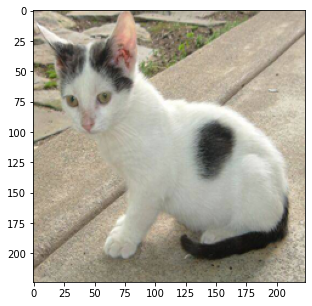

In [12]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[3])

plt.show()

In [13]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


<class 'PIL.Image.Image'>


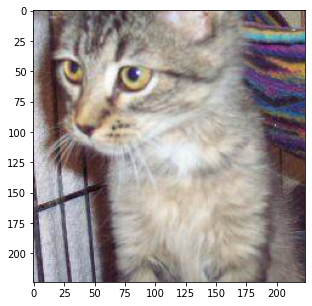

In [14]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

img.close()

## Kerasでも読み込んでみよう

In [15]:
import keras

keras.__version__

Using TensorFlow backend.


'2.3.1'

In [16]:
from keras.preprocessing.image import load_img, img_to_array

In [17]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.25490198, 0.21176471, 0.20392157],
        [0.1882353 , 0.14117648, 0.14117648],
        [0.20784314, 0.16862746, 0.16470589],
        ...,
        [0.627451  , 0.60784316, 0.53333336],
        [0.5764706 , 0.5568628 , 0.48235294],
        [0.43137255, 0.40392157, 0.33333334]],

       [[0.34901962, 0.28235295, 0.30588236],
        [0.21176471, 0.14509805, 0.1764706 ],
        [0.20784314, 0.14117648, 0.17254902],
        ...,
        [0.6901961 , 0.6627451 , 0.5921569 ],
        [0.654902  , 0.627451  , 0.5568628 ],
        [0.43137255, 0.39607844, 0.32941177]],

       [[0.4117647 , 0.32941177, 0.40392157],
        [0.43137255, 0.34901962, 0.42352942],
        [0.37254903, 0.2901961 , 0.3647059 ],
        ...,
        [0.6039216 , 0.5568628 , 0.49411765],
        [0.5647059 , 0.5176471 , 0.45490196],
        [0.46666667, 0.41568628, 0.3529412 ]],

       ...,

       [[0.54901963, 0.52156866, 0.5529412 ],
        [0.24705882, 0.20784314, 0.24313726],
        [0.23529412, 0

<class 'PIL.Image.Image'>


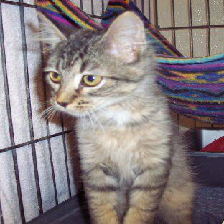

In [18]:
print(type(img_keras))

img_keras

## Resizeについて

In [19]:
import cv2

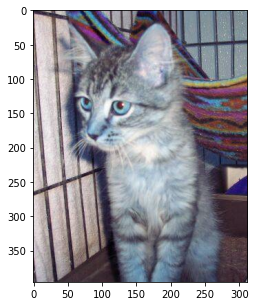

In [20]:
# 元のサイズの画像

img = cv2.imread(img_list[4])

plt.imshow(img)

plt.show()

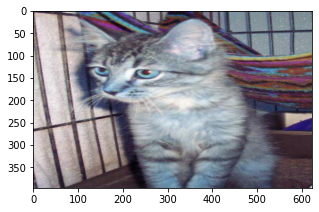

In [21]:
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

img = cv2.imread(img_list[4])

# 横幅2倍にしてみる
img = cv2.resize(img, None, fx = 2, fy = 1)

plt.imshow(img)

plt.show()

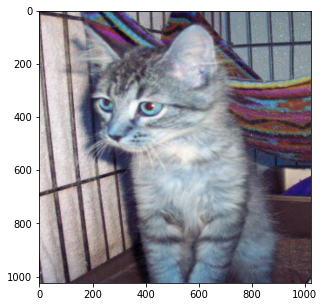

In [22]:
img = cv2.imread(img_list[4])


# cv2でリサイズ　ピクセル補間の方法も指定できる
'''
cv2.INTER_NEAREST :最近傍補間
cv2.INTER_LINEAR :双線形補間（拡大むき）
cv2.INTER_AREA :平均画素法。モアレを軽減させる内挿（縮小むき）
cv2.INTER_CUBIC:4×4 の近傍領域を利用するバイキュービック補間（拡大むき）
cv2.INTER_LANCZOS4:8×8 の近傍領域を利用する Lanczos法の補間

下に行くほど計算時間がかかる



https://www.tech-tech.xyz/opecv_resize.html

http://tessy.org/wiki/index.php?%B2%E8%C1%FC%A4%CE%A5%EA%A5%B5%A5%A4%A5%BA

https://github.com/ArunJayan/OpenCV-Python/search?q=cv2.resize&unscoped_q=cv2.resize

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

'''

img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

# openCVの色形式

## グレースケール 

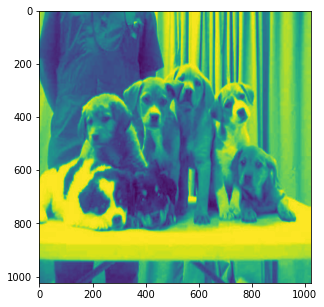

In [23]:
# 第二引数を0にするとグレースケールで読み込める
plt.rcParams['figure.figsize'] = (5.0, 5.0)

img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

In [24]:
img_array_1 = img_to_array(img) / 255.
img_array_1.shape

(1024, 1024, 1)

## BGRとRGB

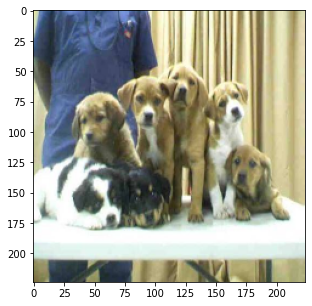

In [25]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

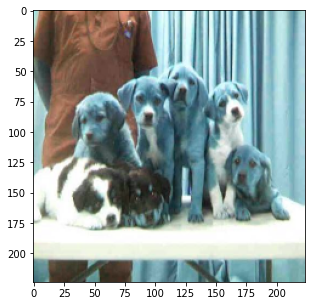

In [26]:
# BGRチャネル

plt.imshow(img)

plt.show()

【問題1】自作データセットでの分類の学習

In [27]:
dog_img_array.shape, cat_img_array.shape

((10, 224, 224, 3), (10, 224, 224, 3))

In [28]:
import numpy as np
train = np.concatenate([dog_img_array, cat_img_array], axis=0)
y = np.zeros(20)
y[10:] = 1
train.shape
y = (y.reshape(-1, 1) == np.arange(2)).astype(np.float64)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2)
x_train.shape, y_train.shape

((16, 224, 224, 3), (16, 2))

In [30]:
import tensorflow as tf
def generate_model():
    return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Activation('softmax')
  ])

model = generate_model()

In [31]:
def compile_model(model):
    opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
    return model

model = compile_model(model)

def train_model(model, x_train, y_train, x_test, y_test, epochs=25):
    model.fit(x_train, y_train, batch_size=256, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

def warmup(model, x_train, y_train, x_test, y_test):
    # Warm up the JIT, we do not wish to measure the compilation time.
    initial_weights = model.get_weights()
    train_model(model, x_train, y_train, x_test, y_test, epochs=1)
    model.set_weights(initial_weights)

warmup(model, x_train, y_train, x_test, y_test)
%time train_model(model, x_train, y_train, x_test, y_test)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1/1 [==============================] - 1s 627ms/step - loss: 0.7098 - accuracy: 0.4375 - val_loss: 0.8719 - val_accuracy: 0.5000
Epoch 1/25
1/1 [==============================] - 0s 364ms/step - loss: 0.7041 - accuracy: 0.3125 - val_loss: 0.8226 - val_accuracy: 0.5000
Epoch 2/25
1/1 [==============================] - 0s 297ms/step - loss: 0.8972 - accuracy: 0.5000 - val_loss: 2.3537 - val_accuracy: 0.5000
Epoch 3/25
1/1 [==============================] - 0s 387ms/step - loss: 4.9768 - accuracy: 0.5000 - val_loss: 0.9137 - val_accuracy: 0.5000
Epoch 4/25
1/1 [==============================] - 0s 315ms/step - loss: 1.1655 - accuracy: 0.5000 - val_loss: 0.9209 - val_accuracy: 0.5000
Epoch 5/25
1/1 [==============================] - 0s 280ms/step - loss: 1.4119 - accuracy: 0.5000 - val_loss: 0.9022 - val_accuracy: 0.5000
Epoch 6/25
1/1 [==============================] - 0s 285ms/step - loss: 1.2578 - accuracy: 0.5000 - val_loss: 0.8471 - val_accuracy: 0.5000
Epoch 7/25
1/1 [===============

【問題2】分類データセットに対するデータ拡張

In [32]:
!pip install albumentations

You should consider upgrading via the '/Users/sasanoshouta/.pyenv/versions/3.8.0/bin/python3.8 -m pip install --upgrade pip' command.


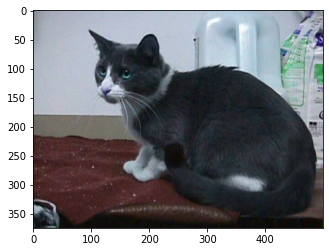

In [33]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
a = cv2.imread(img_list[0])
plt.imshow(a)
plt.show()

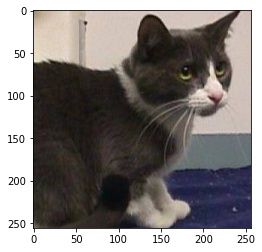

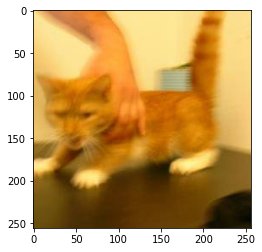

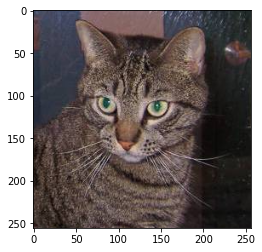

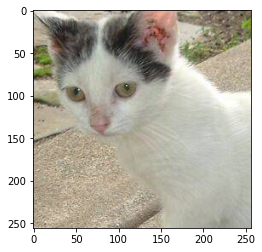

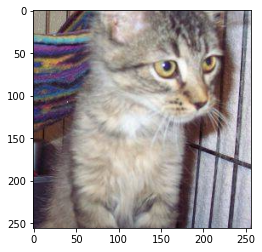

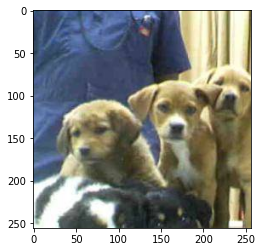

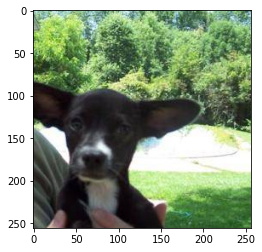

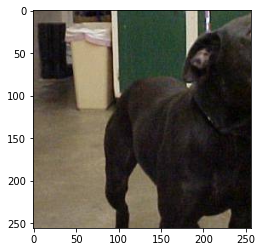

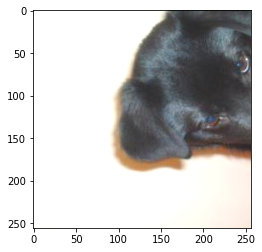

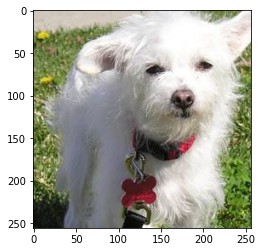

In [34]:
import albumentations as A
import cv2

transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2)
])

for i in img_list:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    transformed = transform(image=image)
    transformed_image = transformed['image']
    
    plt.imshow(transformed_image)
    plt.show()

【問題3】物体検出データセットの用意

In [35]:
!!ls -a /Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training_xml/

['.',
 '..',
 'cat.0_1.xml',
 'cat.1_2.xml',
 'cat.2_3.xml',
 'cat.3_4.xml',
 'cat.4_5.xml',
 'dog.12495_1.xml',
 'dog.12496_2.xml',
 'dog.12497_3.xml',
 'dog.12498_4.xml',
 'dog.12499_5.xml']

【問題4】物体検出データセットに対するデータ拡張

In [37]:
path2 = '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training_xml/' 
second = os.listdir(path2)

second_ignore = [name for name in os.listdir(path2) if not name.startswith('.')]
second_ignore

['dog.12498_4.xml',
 'dog.12499_5.xml',
 'dog.12497_3.xml',
 'cat.3_4.xml',
 'dog.12495_1.xml',
 'cat.1_2.xml',
 'dog.12496_2.xml',
 'cat.2_3.xml',
 'cat.0_1.xml',
 'cat.4_5.xml']

In [49]:
import xml.etree.ElementTree as ET
from os import getcwd

sets=[('2007', 'train'), ('2007', 'val'), ('2007', 'test')]

classes = ["cat", "dog"]


def convert_annotation(image_id, list_file):
    in_file = open(path2+f'{image_id}')
    tree=ET.parse(in_file)
    root = tree.getroot()

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        list_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id)+'\n')
        
# for year, image_set in sets:
#     image_ids = open('VOCdevkit/VOC%s/ImageSets/Main/%s.txt'%(year, image_set)).read().strip().split()
#     list_file = open('%s_%s.txt'%(year, image_set), 'w')
#     for image_id in image_ids:
#         list_file.write('%s/VOCdevkit/VOC%s/JPEGImages/%s.jpg'%(wd, year, image_id))
#         convert_annotation(year, image_id, list_file)
#         list_file.write('\n')
#     list_file.close()


with open('annotation.txt', 'w') as f:
    for i in second_ignore:
        convert_annotation(i, f)

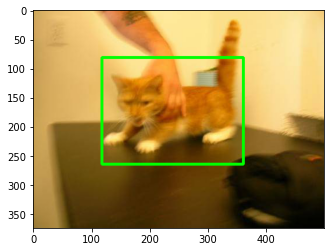

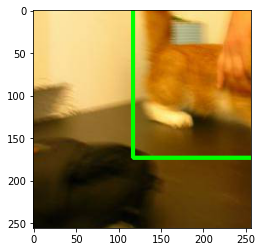

In [83]:
image = np.array(Image.open('/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week12/dogs-vs-cats/training/cat.0.jpg'))
img = cv2.rectangle(image, (118,81),(361,264),(0,255,0),3)
plt.imshow(img)
plt.show()

trans = transform(image=img)
trans_img = trans['image']
plt.imshow(trans_img)
plt.show()

In [42]:
import xml.etree.ElementTree as ET
tree = ET.parse(path2+second_ignore[0])
root = tree.getroot()
print(root.tag)
print(root.attrib)
print(tree.findall)

annotation
{}
<bound method ElementTree.findall of <xml.etree.ElementTree.ElementTree object at 0x14be17220>>
